In [65]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
%matplotlib inline

In [66]:
# Create a dataframe for Perth Modern School
df = pd.DataFrame({"Year": [2016, 2017, 2018, 2019, 2020],
                   "Score": [95.55, 95.9, 97, 96.75, 97.55]})
df

,Year,Score
0,2016,95.55
1,2017,95.90
2,2018,97.00
3,2019,96.75
4,2020,97.55


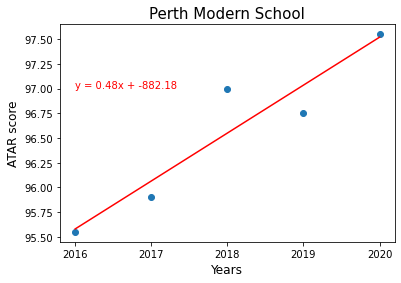

In [67]:
# Check the relationship between the data
x_values = df["Year"]
y_values = df["Score"]
year_count = df["Year"]
plt.scatter(x_values, y_values)
plt.xticks(year_count)
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(2016, 97),fontsize=10,color="red")  
plt.xlabel("Years", fontsize = 12)
plt.ylabel("ATAR score", fontsize = 12)
plt.title("Perth Modern School", fontsize = 15)
plt.show()

In [68]:
# split the data into training and test sets. 
# Script below splits 80% of the data to training set while 20% of the data to test set.
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
df_train_test = pd.DataFrame({"Score": [95.55, 95.9, 97, 96.75, 97.55]})
df_train_test = df_train_test.T
df_train_test

,0,1,2,3,4
Score,95.55,95.9,97.0,96.75,97.55


In [70]:
# divide the data into "attributes" (Year) and "labels" (Score). 
# Attributes are the independent variables while labels are dependent variables whose values are to be predicted.
X = df_train_test.loc['Score', [0,1,2,3]].values.reshape(-1, 1)
y = df_train_test.loc['Score', [4]].values.reshape(-1, 1)
X = X.T
print(X.shape, y.shape)

(1, 4) (1, 1)


In [71]:
X

array([[95.55, 95.9 , 97.  , 96.75]])

In [72]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg = regressor.fit(X, y)

In [73]:
# To retrieve the intercept:
print(regressor.intercept_)

[97.55]


In [74]:
# For retrieving the slope (coefficient of x):
print(regressor.coef_)

[[0. 0. 0. 0.]]


In [75]:
# Making Predictions
y_pred = reg.predict(X)
y_pred

array([[97.55]])

In [76]:
y_pred = y_pred[0]
y_pred

array([97.55])

In [77]:
y = y[0]
y

array([97.55])

In [78]:
# To compare the actual output values for x_test with the predicted values
predict = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
predict

,Actual,Predicted
0,97.55,97.55


In [79]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


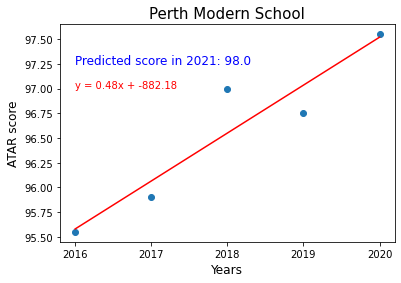

In [80]:
# Perth Modern School linear regression & prediction score in 2021
x_values = df["Year"]
y_values = df["Score"]
year_count = df["Year"]
predict_year = 2021
plt.scatter(x_values, y_values)
plt.xticks(year_count)
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
predicted_2021 = round(slope * predict_year + intercept,2)
plt.annotate(line_eq,(2016, 97),fontsize=10,color="red")  
plt.annotate(f"Predicted score in 2021: {predicted_2021}", (2016, 97.25), fontsize=12, color="blue")
plt.xlabel("Years", fontsize = 12)
plt.ylabel("ATAR score", fontsize = 12)
plt.title("Perth Modern School", fontsize = 15)
plt.show()